In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
import sys

In [2]:
df_customer=pd.read_csv("Customer_Experience_Data.csv")
print (df_customer.shape)
df_customer.head()

(10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
print("missingvalues:")
print(df_customer.isnull().sum())

missingvalues:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [4]:
df_customer.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
## dropping unnecessary column
df_customer.drop(['Geography','Surname','Gender','CustomerId'],inplace=True,axis=1)

In [6]:
df_customer.nunique()

RowNumber          10000
CreditScore          460
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [7]:
df_customer.dtypes

RowNumber            int64
CreditScore          int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

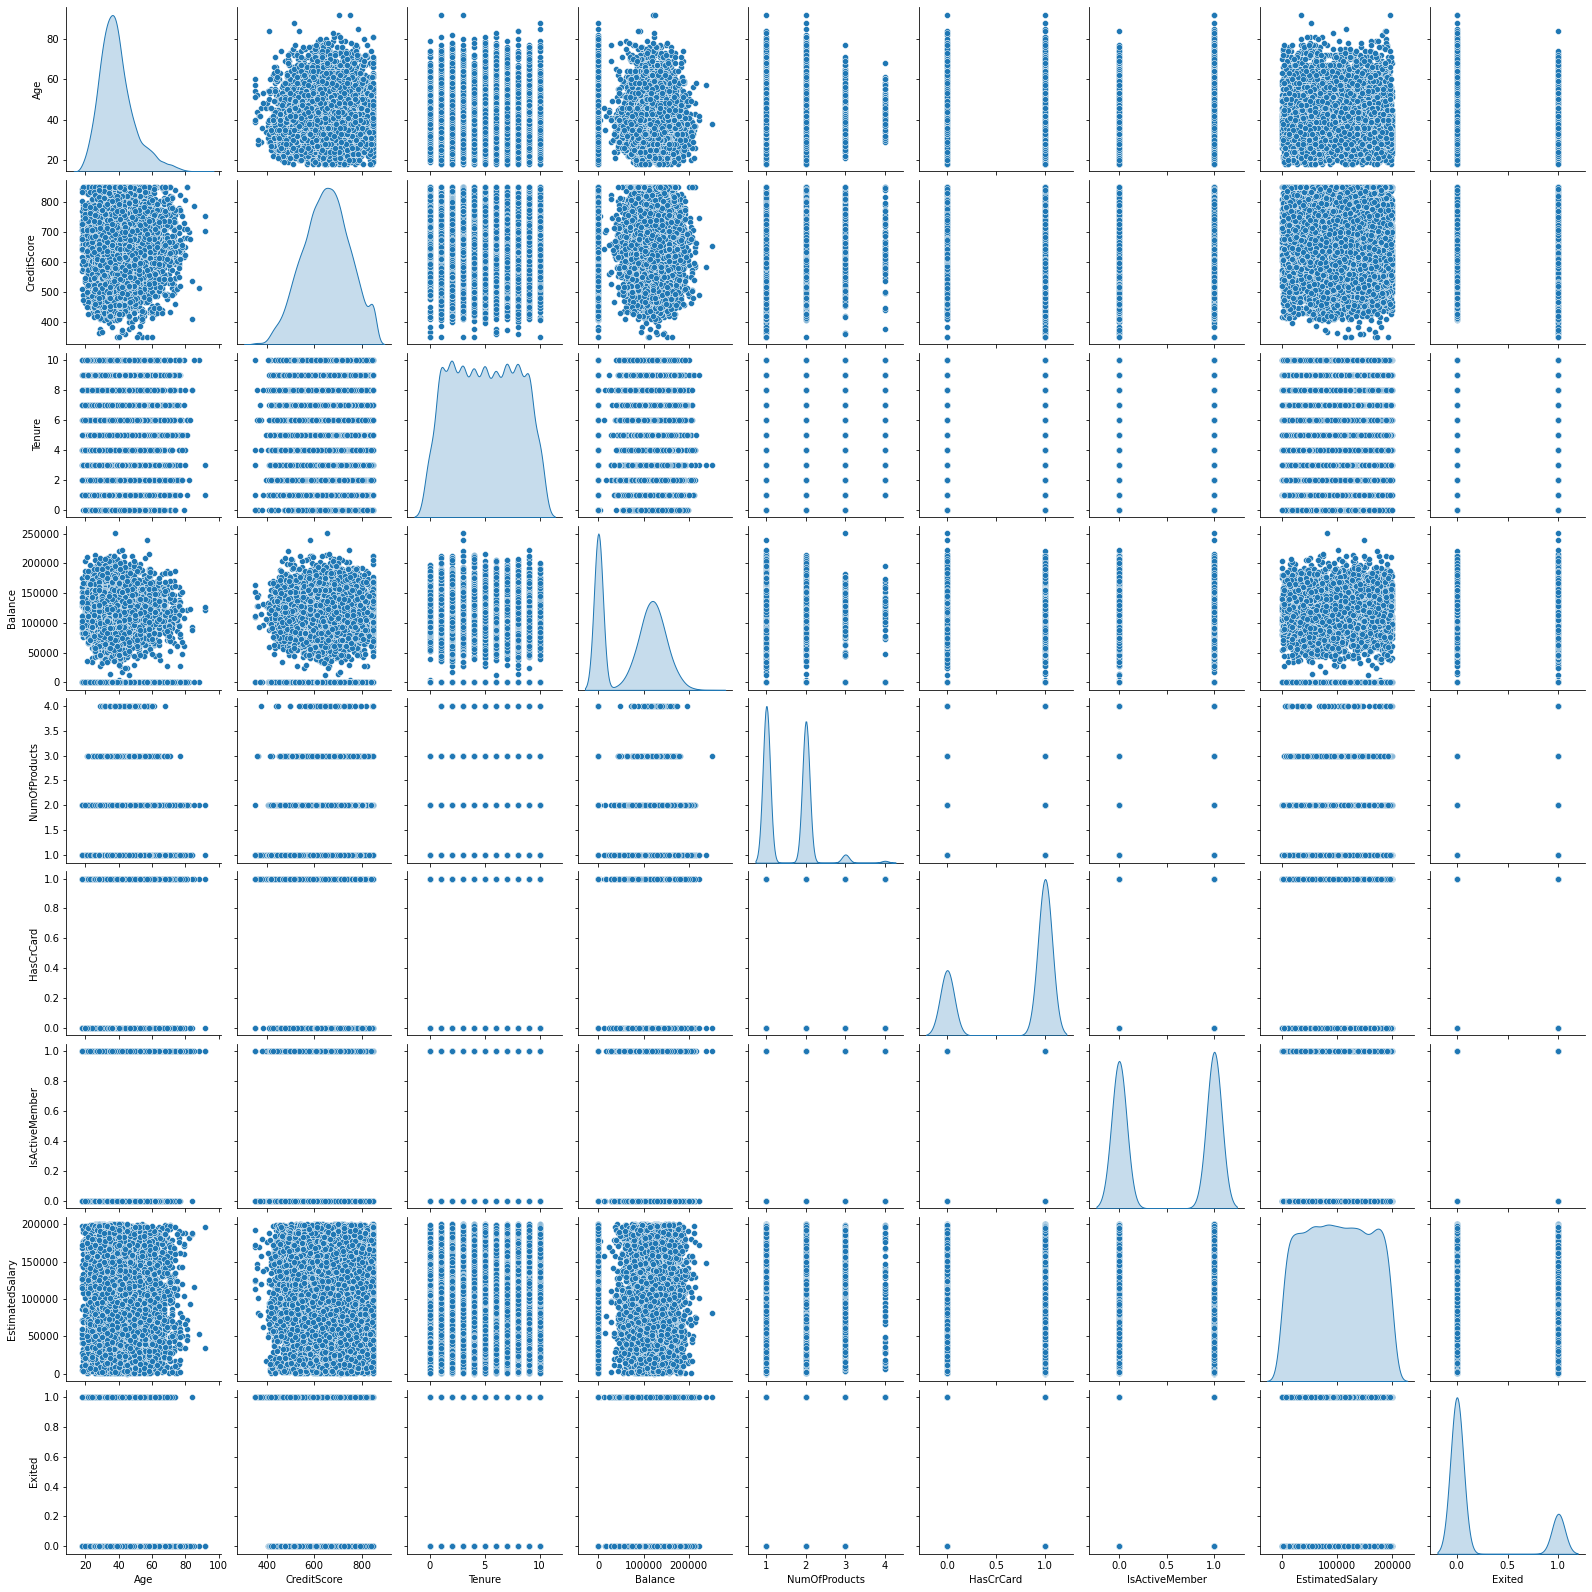

In [8]:
sns.pairplot(df_customer[['Age', 'CreditScore', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']], diag_kind='kde')

In [9]:
scaler=MinMaxScaler()

In [10]:
encoder=LabelEncoder()

In [11]:
for feature in df_customer.select_dtypes('object'):
    df_customer[feature]=encoder.fit_transform(df[feature])

In [12]:
df_customer=pd.DataFrame(scaler.fit_transform(df_customer),columns=df_customer.columns)

In [13]:
df_customer.apply(pd.to_numeric)

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.0000,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0
1,0.0001,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0
2,0.0002,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0
3,0.0003,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0
4,0.0004,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0
...,...,...,...,...,...,...,...,...,...,...
9995,0.9996,0.842,0.283784,0.5,0.000000,0.333333,1.0,0.0,0.481341,0.0
9996,0.9997,0.332,0.229730,1.0,0.228657,0.000000,1.0,1.0,0.508490,0.0
9997,0.9998,0.718,0.243243,0.7,0.000000,0.000000,0.0,1.0,0.210390,1.0
9998,0.9999,0.844,0.324324,0.3,0.299226,0.333333,1.0,0.0,0.464429,1.0


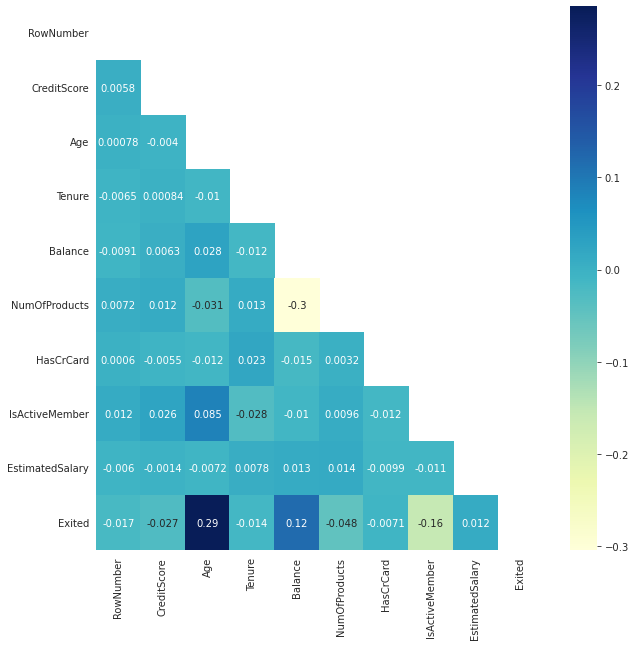

In [14]:
correlation_mat=df_customer.corr()

## creating a mask to hide the top part of triangle
mask=np.zeros_like(correlation_mat)
mask[np.triu_indices_from(correlation_mat)]=True

##creating a heatmap
with sns.axes_style('white'):
    f,ax=plt.subplots(figsize=(10,10))
    ax=sns.heatmap(correlation_mat ,mask=mask,annot=True,cmap='YlGnBu')


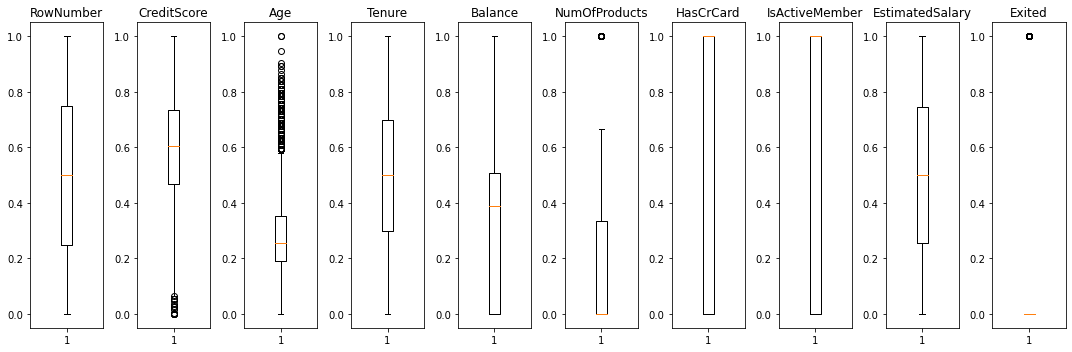

In [15]:
fig,axes=plt.subplots(nrows=1,ncols=len(df_customer.columns),figsize=(15,5))

##creating a boxplot for the  detection of outliers 
for i, column in enumerate(df_customer.columns):
    axes[i].boxplot(df_customer[column])
    axes[i].set_title(column)

##show the layout of the plots
plt.tight_layout()
plt.show()

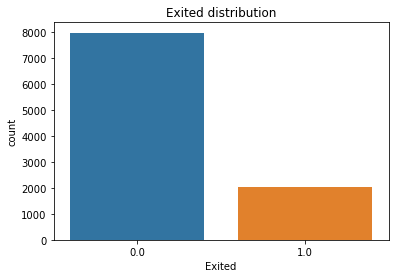

In [16]:
sns.countplot(x='Exited',data=df_customer)
plt.title('Exited distribution')
plt.show()

In [17]:
df_customer.columns

Index(['RowNumber', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [18]:
feature_col=[ 'CreditScore', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary']

In [19]:
x=df_customer[feature_col].values
y=df_customer['Exited']

In [20]:
df_customer['Exited'].value_counts()

0.0    7963
1.0    2037
Name: Exited, dtype: int64

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)
display(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(8000, 8)

(8000,)

(2000, 8)

(2000,)

In [22]:
rf=RandomForestClassifier()

In [23]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [24]:
y_pred=rf.predict(x_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [25]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn import metrics

In [26]:
# evaluation metrics
conf_mat=metrics.confusion_matrix(y_test, y_pred) 
print('confusion matrix:',conf_mat)
accuracy_score=metrics.accuracy_score(y_test,y_pred)
print('Accuracy score:',accuracy_score)
print('percentage accuracy:',int(accuracy_score*100),'%')

confusion matrix: [[1530   65]
 [ 237  168]]
Accuracy score: 0.849
percentage accuracy: 84 %


In [27]:
predictions=rf.predict(x_test)

In [28]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91      1595
         1.0       0.72      0.41      0.53       405

    accuracy                           0.85      2000
   macro avg       0.79      0.69      0.72      2000
weighted avg       0.84      0.85      0.83      2000



<AxesSubplot:xlabel='predicted', ylabel='Actual'>

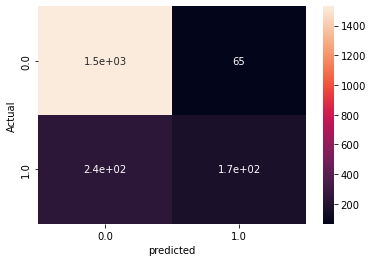

In [29]:
conf_mat=pd.crosstab(y_test,y_pred,rownames=['Actual'],
                     colnames=['predicted'])
sns.heatmap(conf_mat,annot=True)